In [2]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import shapiro
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import mannwhitneyu

# Ćwiczenie 1

In [2]:
# Przykładowe dane dla dwóch grup
grupa1 = np.random.normal(170, 10, 100)  # Średnia 170, odchylenie standardowe 10, liczba obserwacji 100
grupa2 = np.random.normal(175, 15, 100)  # Średnia 175, odchylenie standardowe 15, liczba obserwacji 100

alpha = 0.05

t_stat, p_value = ttest_ind(grupa1, grupa2, equal_var=True)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

interpretacja = "Nie odrzucamy H0; brak wystarczających dowodów na różnicę między grupami." if p_value > alpha else "Odrzucamy H0; istnieją istotne statystycznie różnice między grupami."

print(f"t_stat: {t_stat}, p_value: {p_value}, interpretacja: {interpretacja}")

t_stat: -3.232908267058181, p_value: 0.0014355146245045082, interpretacja: Odrzucamy H0; istnieją istotne statystycznie różnice między grupami.


# T-test dla prób niezależnych
- używany do oceny różnic między średnimi dwóch pewnych artybutów w dwóch niezależnych grupach
- lub dwóch artybutów w tej samej grupie 
## Założenia:
- rozkład normalny (badany za pomocą testu np.Shapiro-Wilka)
- podobna liczebność prób (test chi-kwadrat zgodności), ale jak jedna nie jest od drugiej dwa razy większa to git
- równość wariancji (test Levene'a)

# Ćwiczenie 2

In [8]:
nerwowi = np.array([3, 3, 4, 5, 5])
spokojni = np.array([4, 6, 7, 9, 9])
n_nerwowi = len(nerwowi)
n_spokojni = len(spokojni)
df = n_nerwowi + n_spokojni - 2

# sprawdzenie normalnosci rozkladu
shapiro_test_nerwowi_stat, shapiro_test_nerwowi_p_value = shapiro(nerwowi)
shapiro_test_spokojni_stat, shapiro_test_spokojni_p_value = shapiro(spokojni)

# Sprawdzenie równości wariancji
stat_lev, p_lev = levene(nerwowi, spokojni)
alpha = 0.05
wynik_levene = ("Nie ma podstaw do odrzucenia H0; wariancje są równe." if p_lev > alpha
                else "Przyjmujemy H1; wariancje nie są równe.")
equal_var = p_lev > alpha

t_stat, p_value = ttest_ind(nerwowi, spokojni, equal_var=equal_var)
p_value_one_sided = p_value / 2  # bo interesuje nas tylko jednostronność testu

interpretacja_shapiro_nerwowi = "Nie ma podstaw do odrzucenia normalności rozkładu dla osób nerwowych." if shapiro_test_nerwowi_p_value > alpha else "Odrzucamy hipotezę o normalności rozkładu dla osób nerwowych."
interpretacja_shapiro_spokojni = "Nie ma podstaw do odrzucenia normalności rozkładu dla osób spokojnych." if shapiro_test_spokojni_p_value > alpha else "Odrzucamy hipotezę o normalności rozkładu dla osób spokojnych."
wynik_levene = "Nie ma podstaw do odrzucenia H0; wariancje są równe." if p_lev > alpha else "Przyjmujemy H1; wariancje nie są równe."
interpretacja_testu_t = ("Odrzucamy H0 na rzecz H1; osoby nerwowe gestykulują więcej niż spokojne." if (p_value_one_sided <= alpha and t_stat > 0)
                         else "Przyjmujemy H1; brak wystarczających dowodów na to, że osoby nerwowe gestykulują więcej niż spokojne.")

print(f"""
Sprawdzenie normlaności rozkładu za pomocą testu Shapiro-Wilka:
- Dla osób nerwowych: P-wartość = {shapiro_test_nerwowi_p_value:.4f}, statytstyka testowa: {shapiro_test_nerwowi_stat:.4f}, Interpretacja: {interpretacja_shapiro_nerwowi}
- Dla osób spokojnych: P-wartość = {shapiro_test_spokojni_p_value:.4f}, statytstyka testowa: {shapiro_test_spokojni_stat:.4f}, Interpretacja: {interpretacja_shapiro_spokojni}

Sprawdzenie równości wariancji:
- P-wartość dla testu Levene'a: {p_lev:.4f}, statystyka testowa: {stat_lev:.4f}
- {wynik_levene}

Wynik testu t dla prób niezależnych:
- Wartość t-statystyki: {t_stat:.4f}, p-wartość dla testu jednostronnego: {p_value_one_sided:.4f}
- Interpretacja: {interpretacja_testu_t}
Stopień swobody (df): {df}
""")

# Hipoteza zerowa: Nie ma różnicy w średniej ilości gestykulacji między osobami nerwowymi i spokojnymi.
# Hipoteza alternatywna: Osoby nerwowe gestykulują więcej niż spokojne.
# możemy zastosować test t dla prób niezależnych, ponieważ mamy dwie niezależne grupy obserwacji
# test t moze być jednostronny, ponieważ interesuje nas tylko to, czy osoby nerwowe gestykulują więcej
# stopień swobody: df = n1 + n2 - 2 = 5 + 5 - 2 = 8


Sprawdzenie normlaności rozkładu za pomocą testu Shapiro-Wilka:
- Dla osób nerwowych: P-wartość = 0.1185, statytstyka testowa: 0.8208, Interpretacja: Nie ma podstaw do odrzucenia normalności rozkładu dla osób nerwowych.
- Dla osób spokojnych: P-wartość = 0.4677, statytstyka testowa: 0.9100, Interpretacja: Nie ma podstaw do odrzucenia normalności rozkładu dla osób spokojnych.

Sprawdzenie równości wariancji:
- P-wartość dla testu Levene'a: 0.1823, statystyka testowa: 2.1333
- Nie ma podstaw do odrzucenia H0; wariancje są równe.

Wynik testu t dla prób niezależnych:
- Wartość t-statystyki: -2.8604, p-wartość dla testu jednostronnego: 0.0106
- Interpretacja: Przyjmujemy H1; brak wystarczających dowodów na to, że osoby nerwowe gestykulują więcej niż spokojne.
Stopień swobody (df): 8


# Ćwiczenie 3

In [10]:
mniej30 = np.array([6, 7, 10, 9])
po30 = np.array([5, 6, 2, 3])
n_mniej30 = len(mniej30)
n_po30 = len(po30)
alpha = 0.05

stat_lev_3, p_lev_3 = levene(mniej30, po30)
shapiro_mniej30_stat, shapiro_mniej30_pvalue = shapiro(mniej30)
shapiro_po30_stat, shapiro_po30_pvalue = shapiro(po30)

equal_var_3 = p_lev_3 > alpha
t_stat_3, p_value_3 = ttest_ind(mniej30, po30, equal_var=equal_var_3)

# Ponieważ hipoteza dotyczy tego, że osoby poniżej 30 są bardziej "rozbawione", interesuje nas jednostronność testu
p_value_one_sided_3 = p_value_3 / 2
df = (n_mniej30 + n_po30 - 2)  # 4 + 4 - 2 = 6

print(f"""
Sprawdzenie normalności rozkładu za pomocą testu Shapiro-Wilka:
- Dla osób poniżej 30 roku życia: P-wartość = {shapiro_mniej30_pvalue:.4f}, statystyka testowa: {shapiro_mniej30_stat:.4f},
  {"nie ma podstaw do odrzucenia normalności rozkładu." if shapiro_mniej30_pvalue > alpha else "rozkład nie jest normalny."}
- Dla osób powyżej 30 roku życia: P-wartość = {shapiro_po30_pvalue:.4f}, statystyka testowa: {shapiro_po30_stat:.4f},
  {"nie ma podstaw do odrzucenia normalności rozkładu." if shapiro_po30_pvalue > alpha else "rozkład nie jest normalny."}

Sprawdzenie równości wariancji:
- P-wartość dla testu Levene'a: {p_lev_3:.4f}, statystyka testowa: {stat_lev_3:.4f}
- {"Nie ma podstaw do odrzucenia H0; wariancje są równe." if equal_var_3 else "Odrzucamy H0; wariancje nie są równe."}

Wynik testu t dla prób niezależnych:
- Wartość t-statystyki: {t_stat_3:.4f}, p-wartość dla testu jednostronnego: {p_value_one_sided_3:.4f}
- {"Odrzucamy H0; osoby poniżej 30 są bardziej 'rozbawione'." if p_value_one_sided_3 <= alpha and t_stat_3 > 0
else "Nie odrzucamy H0; brak dowodów na większe 'rozbawienie' osób poniżej 30."}
Stopień swobody (df): {df}
""")

# Hipoteza zerowa: Nie ma różnicy w poziomie "rozbawienia" między osobami poniżej i powyżej 30 roku życia.
# Hipoteza alternatywna: Osoby poniżej 30 roku życia są bardziej "rozbawione" niż osoby powyżej 30 roku życia.
# możemy zastosować test t dla prób niezależnych, ponieważ mamy dwie niezależne grupy obserwacji
# test t moze być jednostronny, ponieważ interesuje nas tylko to, czy osoby poniżej 30 są bardziej "rozbawione"
# stopień swobody: df = n1 + n2 - 2 = 4 + 4 - 2 = 6


Sprawdzenie normalności rozkładu za pomocą testu Shapiro-Wilka:
- Dla osób poniżej 30 roku życia: P-wartość = 0.7143, statystyka testowa: 0.9497,
  nie ma podstaw do odrzucenia normalności rozkładu.
- Dla osób powyżej 30 roku życia: P-wartość = 0.7143, statystyka testowa: 0.9497,
  nie ma podstaw do odrzucenia normalności rozkładu.

Sprawdzenie równości wariancji:
- P-wartość dla testu Levene'a: 1.0000, statystyka testowa: 0.0000
- Nie ma podstaw do odrzucenia H0; wariancje są równe.

Wynik testu t dla prób niezależnych:
- Wartość t-statystyki: 3.0984, p-wartość dla testu jednostronnego: 0.0106
- Odrzucamy H0; osoby poniżej 30 są bardziej 'rozbawione'.
Stopień swobody (df): 6


# Test t dla prób zależnych
- używany w celu weryfikacji czy wyniki danej grupy różnią się pomiędzy warunkami w jakich zostały one uzyskane
- np. wyniki uzyskane przez tę samą grupę osób przed i po przeprowadzeniu eksperymentu ( np. przed i po leczeniu)
## Zmienność wewnątrzgrupowa:
- ważne jest, aby zwracać uwagę na zmienność wewnątrzgrupową, ponieważ może ona wpłynąć na wyniki testu t dla prób zależnych
- test t dla prób zależnych jest mniej wrażliwy na zmienność wewnątrzgrupową niż test t dla prób niezależnych
## Test t dla prób zależnych:
- można 'wyeliminiować' wariancje wewnątrzgrupowe, ponieważ porównujemy wyniki uzyskane przez tę samą grupę osób, bo zamiast patrzeć na każdy wynik osobno, patrzymy na różnicę między wynikami
- test t daje 'lepsze' wyniki dla grup zależnych niż niezależnych

# Ćwiczenie 4

- Grupy te są niezależne od siebie, więc nie da się zastosować testu t dla prób zależnych
- Możemy jednak zastosować test t dla prób niezależnych, ale musimy sprawdzić, czy grupy mają rozkłady normalne i zbliżone wariancje

## Żeby poprawić dane do testu t dla prób niezależnych:
- trzeba dodać dane przed i po, żeby zrobić z nich jedną grupę np. po jakimś szkoleniu itp


Sprawdzenie równości wariancji (test Levene'a):
- P-wartość: 0.1823, Statystyka testowa: 2.1333
- Interpretacja: Nie ma podstaw do odrzucenia H0; wariancje są zbliżone.

Wyniki testu Shapiro-Wilka:
- Dla kobiet: Statystyka testowa: 0.9806, p-wartość: 0.0000
- Interpretacja dla kobiet: Odrzucamy H0; rozkład nie jest normalny.
- Dla mężczyzn: Statystyka testowa: 0.9748, p-wartość: 0.0000
- Interpretacja dla mężczyzn: Odrzucamy H0; rozkład nie jest normalny.

Stopień swobody (df): 1098


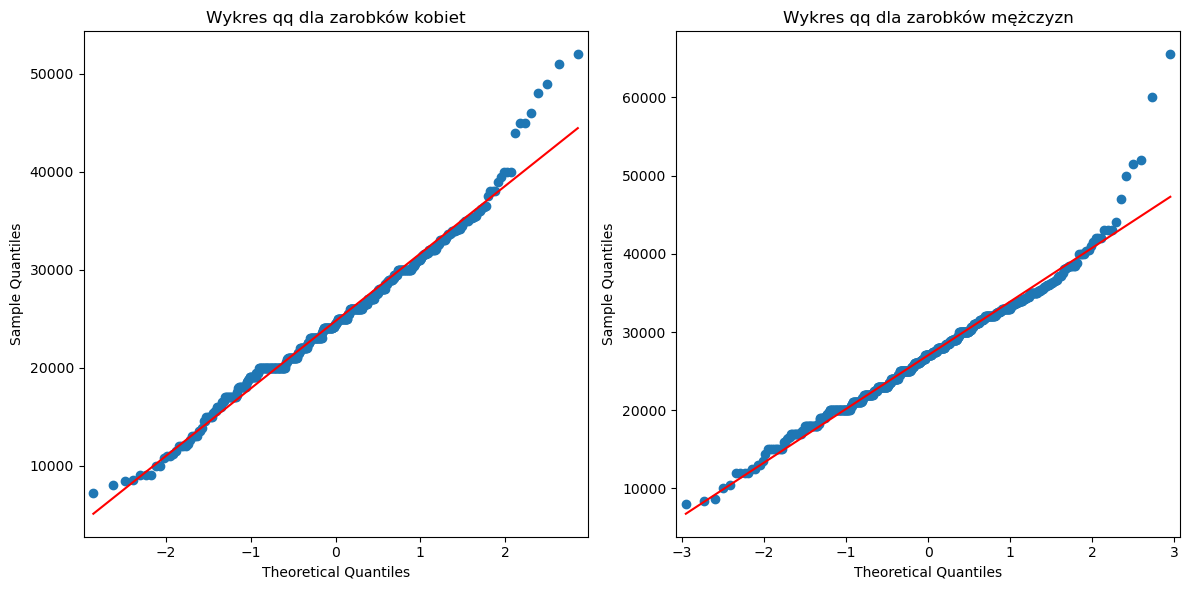

In [5]:
data_path = 'data/absolwenci.csv'
df = pd.read_csv(data_path, delimiter=';', encoding='ISO-8859-1')

salaries_women = df[df['GENDER'] == 'Kobieta']['SALARY']
salaries_men = df[df['GENDER'] == 'Mezczyzna']['SALARY']
n_women = len(salaries_women)
n_men = len(salaries_men)
df_4 = n_women + n_men - 2

stat_lev_4, p_lev_4 = levene(salaries_women, salaries_men)
alpha = 0.05
wynik_levene = "Nie ma podstaw do odrzucenia H0; wariancje są zbliżone." if p_lev_4 > alpha else "Odrzucamy H0; wariancje nie są zbliżone."
equal_var = p_lev_4 > alpha

shapiro_test_women_stat, shapiro_test_women_p_value = shapiro(salaries_women)
wynik_shapiro_women = "Nie ma podstaw do odrzucenia H0 o normalności rozkładu." if shapiro_test_women_p_value > alpha \
    else "Odrzucamy H0; rozkład nie jest normalny."

shapiro_test_men_stat, shapiro_test_men_p_value = shapiro(salaries_men)
wynik_shapiro_men = "Nie ma podstaw do odrzucenia H0 o normalności rozkładu." if shapiro_test_men_p_value > alpha \
    else "Odrzucamy H0; rozkład nie jest normalny."

print(f"""
Sprawdzenie równości wariancji (test Levene'a):
- P-wartość: {p_lev:.4f}, Statystyka testowa: {stat_lev:.4f}
- Interpretacja: {wynik_levene}

Wyniki testu Shapiro-Wilka:
- Dla kobiet: Statystyka testowa: {shapiro_test_women_stat:.4f}, p-wartość: {shapiro_test_women_p_value:.4f}
- Interpretacja dla kobiet: {wynik_shapiro_women}
- Dla mężczyzn: Statystyka testowa: {shapiro_test_men_stat:.4f}, p-wartość: {shapiro_test_men_p_value:.4f}
- Interpretacja dla mężczyzn: {wynik_shapiro_men}

Stopień swobody (df): {df_4}
""")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
sm.qqplot(salaries_women, line='s', ax=ax1)
ax1.set_title('Wykres qq dla zarobków kobiet')

ax2 = fig.add_subplot(122)
sm.qqplot(salaries_men, line='s', ax=ax2)
ax2.set_title('Wykres qq dla zarobków mężczyzn')

plt.tight_layout()
plt.show()

# Test t dla jednej próby:
- tutaj tylko ważne, zeby rozkład był zbliżony normalny

# Ćwiczenie 5

In [6]:
data13 = np.array([175.26, 177.8, 167.64000000000001, 160.02, 172.72, 177.8, 175.26, 170.18, 157.48, 160.02, 193.04, 149.86, 157.48, 157.48, 190.5, 157.48, 182.88, 160.02])

shapiro_test_data13_stat, shapiro_test_data13_p_value = shapiro(data13)
alpha = 0.05
interpretacja_shapiro_data13 = ("Dane mają rozkład zbliżony do normalnego." if shapiro_test_data13_p_value > alpha
                                else "Dane nie mają rozkładu zbliżonego do normalnego.")

print(
    f"Test Shapiro-Wilka dla danych 'data13':\n Statystyka testowa: {shapiro_test_data13_stat:.4f}, p-wartość: {shapiro_test_data13_p_value:.4f}\n Interpretacja: {interpretacja_shapiro_data13} \n")

srednia_hipotetyczna_5 = 169.051

t_stat, p_value = ttest_1samp(data13, srednia_hipotetyczna_5)

interpretacja_testu_t = ("Odrzucamy hipotezę zerową; istnieje statystycznie istotna różnica między średnim wzrostem a wartością 169.051."
                         if p_value <= alpha else "Nie odrzucamy hipotezy zerowej; brak wystarczających dowodów na statystycznie istotną różnicę między średnim wzrostem, a wartością hipoteyczną.")

print(f"Test t dla jednej próby:\n Wartość t-statystyki: {t_stat:.4f}, p-wartość: {p_value:.4f}\n Interpretacja: {interpretacja_testu_t}")



Test Shapiro-Wilka dla danych 'data13':
 Statystyka testowa: 0.9321, p-wartość: 0.2116
 Interpretacja: Dane mają rozkład zbliżony do normalnego. 

Test t dla jednej próby:
 Wartość t-statystyki: 0.0000, p-wartość: 1.0000
 Interpretacja: Nie odrzucamy hipotezy zerowej; brak wystarczających dowodów na statystycznie istotną różnicę między średnim wzrostem, a wartością hipoteyczną.


# Ćwiczenie 6

In [7]:
data17 = np.array([172.72, 157.48, 170.18, 172.72, 175.26, 170.18, 154.94, 149.86, 157.48, 154.94, 175.26, 167.64000000000001, 157.48, 157.48, 154.94, 177.8])

alpha = 0.05
shapiro_test_data17_stat, shapiro_test_data17_p_value = shapiro(data17)
interpretacja_shapiro_data17 = ("Dane mają rozkład zbliżony do normalnego." if shapiro_test_data17_p_value > alpha
                                else "Dane nie mają rozkładu zbliżonego do normalnego.")

print(
    f"Test Shapiro-Wilka dla danych 'data17':\n Statystyka testowa: {shapiro_test_data17_stat:.4f}, p-wartość: {shapiro_test_data17_p_value:.4f}\n Interpretacja: {interpretacja_shapiro_data17} \n ")

# srednia_hipotetyczna_6 = 164.1475
# 
# t_stat, p_value = ttest_1samp(data17, srednia_hipotetyczna_6)
# 
# interpretacja_testu_t = ("Odrzucamy hipotezę zerową; istnieje statystycznie istotna różnica między średnim wzrostem a wartością 164.1475."
#                          if p_value < alpha else "Nie odrzucamy hipotezy zerowej; brak wystarczających dowodów na statystycznie istotną różnicę między średnim wzrostem, a wartością hipotetyczną.")
# 
# print(f"Test t dla jednej próby:\n Wartość t-statystyki: {t_stat:.4f}, p-wartość: {p_value:.4f}\n Interpretacja: {interpretacja_testu_t}")


Test Shapiro-Wilka dla danych 'data17':
 Statystyka testowa: 0.8786, p-wartość: 0.0369
 Interpretacja: Dane nie mają rozkładu zbliżonego do normalnego. 
 


# Mann-Whitney U test
- używany do porównywania dwóch niezależnych prób, które nie spełniają założeń testu t
- nie wymaga on równolicznośći grup, rozkladu normalnego, ani równości wariancji

## Założenia:
- wszystkie obserwacje są niezależne od siebie
- zmienne X i Y są mierzone na skali porządkowej
- Hipoteza zerowa o symetrii rozkładu względem prawdopodobieństwa większej wartości jednej ze zmiennych (X > Y) kontra większej wartości drugiej zmiennej (Y > X) sugeruje, że nie ma różnicy między grupami pod względem mediany lub lokalizacji rozkładu. Innymi słowy, zakładamy, że szansa, iż wartość zmiennej X będzie większa od wartości zmiennej Y, jest taka sama, jak szansa, że wartość Y będzie większa od X. W praktyce oznacza to, że oczekujemy, iż obie grupy są "statystycznie symetryczne" względem siebie – nie ma przewagi jednej grupy nad drugą pod względem badanej cechy.
- Hipoteza alternatywna mówi o istnieniu asymetrii – że prawdopodobieństwa te nie są równe. W wersji dwustronnej testu, hipoteza alternatywna zakłada, że prawdopodobieństwo, iż wartość zmiennej X jest większa niż Y, jest różne od prawdopodobieństwa, że Y > X. To sugeruje, że istnieje statystycznie istotna różnica między grupami pod względem lokalizacji rozkładu (np. mediany). Może to oznaczać, że jedna z grup ma tendencję do osiągania wyższych wartości niż druga. W wersji jednostronnej testu, hipoteza alternatywna jest bardziej konkretne – zakładamy, że jedna grupa ma statystycznie istotnie większe wartości niż druga, w zależności od kierunku testu (czy interesuje nas, że X > Y lub że X < Y).

Są to bardzo ogólne założenia i hipotezy, które można dostosować do konkretnego problemu badawczego.

# Ćwiczenie 7

In [8]:
nerwowi_7 = [3, 3, 4, 5, 5]
spokojni_7 = [4, 6, 7, 9, 9]

# hipoteza zerowa: nie ma różnicy w ilości gestów między osobami nerwowym, a spokojnymi
# hipoteza alternatywna: osoby nerwowe wykonują więcej gestów niż spokojne

u_stat_7, p_value_7 = mannwhitneyu(nerwowi_7, spokojni_7, alternative='greater')

alpha = 0.05
interpretacja_7 = ("Możemy odrzucić hipotezę zerową; osoby nerwowe wykonują więcej gestów niż osoby spokojne."
                   if p_value_7 <= alpha else "Nie możemy odrzucić hipotezy zerowej; brak dowodów na to, że osoby nerwowe wykonują więcej gestów niż osoby spokojne.")

print("""
Wynik testu U Manna-Whitneya:
- Wartość statystyki U: {}
- P-wartość: {}
- Interpretacja: {}
""".format(u_stat_7, p_value_7, interpretacja_7))


Wynik testu U Manna-Whitneya:
- Wartość statystyki U: 2.5
- P-wartość: 0.986806161200152
- Interpretacja: Nie możemy odrzucić hipotezy zerowej; brak dowodów na to, że osoby nerwowe wykonują więcej gestów niż osoby spokojne.


# Ćwiczenie 8

In [11]:

data13 = [175.26, 177.8, 167.64, 160.02, 172.72, 177.8, 175.26, 170.18, 157.48, 160.02, 193.04, 149.86, 157.48, 157.48, 190.5, 157.48, 182.88, 160.02]
data17 = [172.72, 157.48, 170.18, 172.72, 175.26, 170.18, 154.94, 149.86, 157.48, 154.94, 175.26, 167.64, 157.48, 157.48, 154.94, 177.8]

u_stat_8, p_value_8 = mannwhitneyu(data13, data17, alternative='two-sided')
# hipoteza zerowa: nie ma różnicy w wzroście między grupami
# hipoteza alternatywna: istnieje różnica w wzroście między grupami

alpha_8 = 0.05

interpretacja_8 = ("Możemy odrzucić hipotezę zerową; istnieje różnica w wzroście między grupami."
                   if p_value_8 <= alpha_8 else "Nie możemy odrzucić hipotezy zerowej; brak dowodów na różnicę w wzroście między grupami.")

print("""
Wynik testu U Manna-Whitneya:
- Wartość statystyki U: {}
- P-wartość: {}
- Interpretacja: {}
""".format(u_stat_8, p_value_8, interpretacja_8))


Wynik testu U Manna-Whitneya:
- Wartość statystyki U: 186.0
- P-wartość: 0.14852918271604412
- Interpretacja: Nie możemy odrzucić hipotezy zerowej; brak dowodów na różnicę w wzroście między grupami.
